In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### PLOTTING FUNCTIONS

In [11]:
# Function to plot specified variable per run
def plot_all_runs(df_list, var, color=None):
    label = var
    for df in df_list:
        df[var].plot(label=label, color=color) if color else df[var].plot(label=label)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()

def plot_difference(df_list, var1, var2):
    label = str(var1) + " - " + str(var2)
    for df in df_list:
        diff = df[var1] - df[var2]
        diff.plot(label=label)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.legend()

def plot_avg_per_type(df_list, agent_type, var, color=None):
    label = agent_type
    for df in df_list:
        df = df[df["Type"] == agent_type]
        df.groupby(["Step"])[var].mean().plot(label=label, color=color)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()

def plot_total_per_type(df_list, agent_type, var, color=None):
    label = agent_type
    for df in df_list:
        df = df[df["Type"] == agent_type]
        df.groupby(["Step"])[var].sum().plot(label=label, color=color)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()

### READ DATA

#### Model variables

In [12]:
# Read all model variables to list
model_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("model"):
        df = pd.read_csv("results/" + file)
        model_vars_df_list.append(df)

# Show first dataframe
model_vars_df_list[0]

,n_agents,n_households,n_cap_firms,n_cons_firms,n_serv_firms,HH consumption,Regional demand,Export demand,Unemployment rate,Min wage,Avg wage,Frac machines dead,Changed supplier cap,Changed supplier cons,Changed supplier serv
0,20626,20000,125,200,300,3039.813672,3039.814,0.0,0.94,0.100,1.02,0.000000,0,0,0
1,20626,20000,125,200,300,11857.664672,11857.664,0.0,0.84,0.510,1.02,0.000000,0,0,0
2,20626,20000,125,200,300,13323.872672,13323.873,0.0,0.70,0.510,1.03,0.000000,0,47,97
3,20626,20000,125,200,300,16145.484365,16145.484,0.0,0.43,0.515,1.02,0.000000,58,83,136
4,20626,20000,125,200,300,16839.057246,16839.057,0.0,0.36,0.510,1.03,0.000000,66,50,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20626,20000,125,200,300,18095.377632,18095.377,0.0,0.23,0.510,1.02,0.049542,28,111,135
96,20626,20000,125,200,300,18166.945388,18166.946,0.0,0.22,0.510,1.02,0.048391,33,114,143
97,20626,20000,125,200,300,18252.605106,18252.606,0.0,0.22,0.510,1.02,0.049123,26,112,151
98,20626,20000,125,200,300,18090.202612,18090.203,0.0,0.23,0.510,1.02,0.048774,30,108,155


#### Agent variables

In [13]:
agent_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("agent"):
        print(file)
        df = pd.read_csv("results/" + file)
        agent_vars_df_list.append(df)

agent_vars_df_list[0]

agent_vars_0.csv


,Step,AgentID,Type,Price,Market share,Prod,Inventories,Production made,Real demand,Wage,Net worth,Size,Labor demand,Capital desired,Capital amount,Capital ordered
0,1,1,<class 'CRAB_agents.CapitalFirm'>,1.2380,0.008000,1.0,1.000,1.0,0.000,1.031848,150.000000,1.0,1.0,NaN,60.0,NaN
1,1,2,<class 'CRAB_agents.CapitalFirm'>,1.2510,0.008000,1.0,1.000,1.0,0.000,1.042870,150.000000,1.0,1.0,NaN,60.0,NaN
2,1,3,<class 'CRAB_agents.CapitalFirm'>,1.2370,0.008000,1.0,1.000,1.0,0.000,1.030769,150.000000,1.0,1.0,NaN,60.0,NaN
3,1,4,<class 'CRAB_agents.CapitalFirm'>,1.2290,0.008000,1.0,1.000,1.0,0.000,1.024292,150.000000,1.0,1.0,NaN,60.0,NaN
4,1,5,<class 'CRAB_agents.CapitalFirm'>,1.2050,0.008000,1.0,1.000,1.0,0.000,1.004201,150.000000,1.0,1.0,NaN,60.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062595,100,20853,<class 'CRAB_agents.ServiceFirm'>,1.2108,0.000262,1.0,0.255,3.0,2.745,1.009000,11.225200,3.0,3.0,NaN,10.0,NaN
2062596,100,20854,<class 'CRAB_agents.ConsumptionGoodFirm'>,1.2012,0.000724,1.0,0.000,2.0,3.282,1.001000,57.279163,2.0,2.0,NaN,8.0,NaN
2062597,100,20855,<class 'CRAB_agents.ServiceFirm'>,1.2132,0.000230,1.0,0.000,2.0,2.407,1.011000,24.625923,2.0,2.0,NaN,10.0,NaN
2062598,100,20856,<class 'CRAB_agents.ConsumptionGoodFirm'>,1.2168,0.000000,1.0,0.000,1.0,1.000,1.014000,40.757720,0.0,NaN,NaN,7.0,NaN


### SANITY CHECKS

#### N FIRMS

In [ ]:
# Plot number of firms per sector
plot_all_runs(model_vars_df_list, "n_cap_firms", color="tab:blue")
plot_all_runs(model_vars_df_list, "n_cons_firms", color="tab:orange")
plot_all_runs(model_vars_df_list, "n_serv_firms", color="tab:green")

plt.ylabel("N firms")
plt.show()

#### CONSUMPTION AND DEMAND

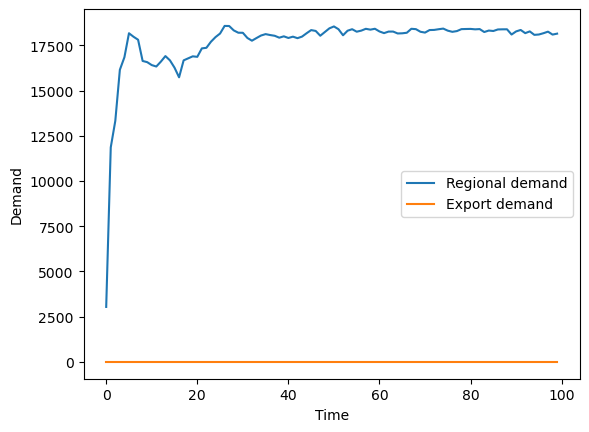

In [14]:
# Plot ratio regional:export demand
plot_all_runs(model_vars_df_list, "Regional demand", color="tab:blue")
plot_all_runs(model_vars_df_list, "Export demand", color="tab:orange")

plt.ylabel("Demand")
plt.show()

In [ ]:
# Check HH consumption equals regional demand
plot_difference(model_vars_df_list, "Regional demand", "HH consumption")
plt.show()

#### REAL DEMAND

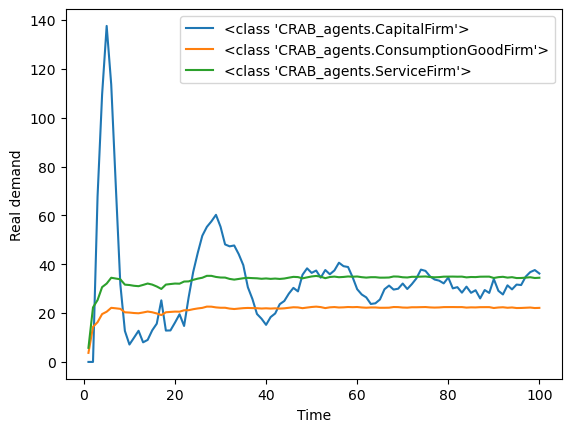

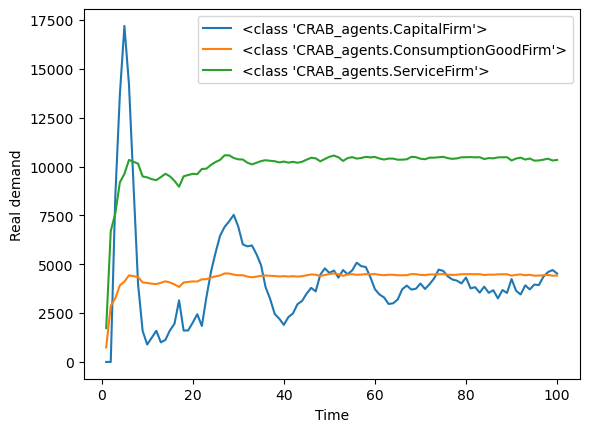

In [15]:
# Plot average demand per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Real demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Real demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Real demand", color="tab:green")
plt.show()

plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Real demand", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Real demand", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Real demand", color="tab:green")
plt.show()

#### LABOR

##### UNEMPLOYMENT RATE

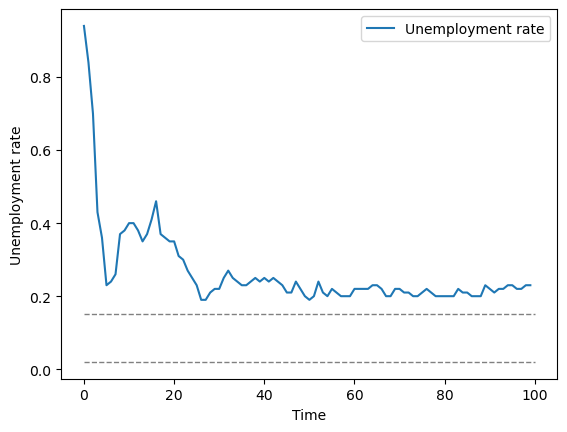

In [16]:
# Unemployment rate should vary between min 2-3 and max 10-15 percent
n_steps = len(model_vars_df_list[0])
plot_all_runs(model_vars_df_list, "Unemployment rate")
plt.hlines(y=0.02, xmin=0, xmax=n_steps, color="grey", linestyle="--", linewidth=1)
plt.hlines(y=0.15, xmin=0, xmax=n_steps, color="grey", linestyle="--", linewidth=1)
plt.show()

##### LABOR DEMAND

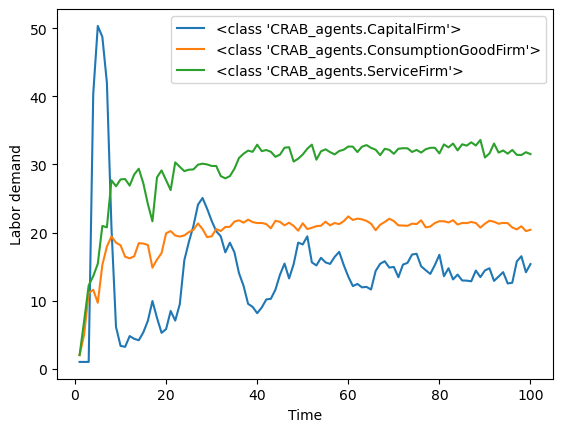

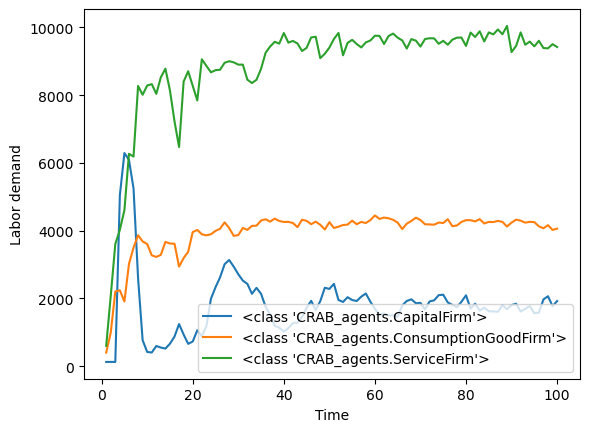

In [17]:
# Plot average labor demand per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Labor demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Labor demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Labor demand", color="tab:green")
plt.show()

# Plot total labor demand per sector
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Labor demand", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Labor demand", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Labor demand", color="tab:green")
plt.show()

##### Additional labor demand

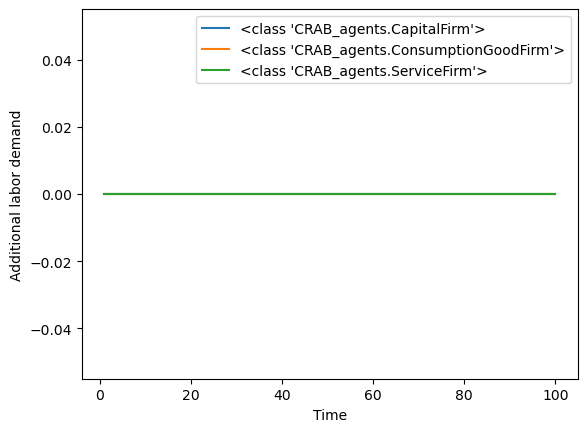

In [18]:
# Plot average labor demand per sector
for df in agent_vars_df_list:
    df["Additional labor demand"] = df["Size"] - df["Labor demand"]
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Additional labor demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Additional labor demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Additional labor demand", color="tab:green")
plt.show()

##### SIZE

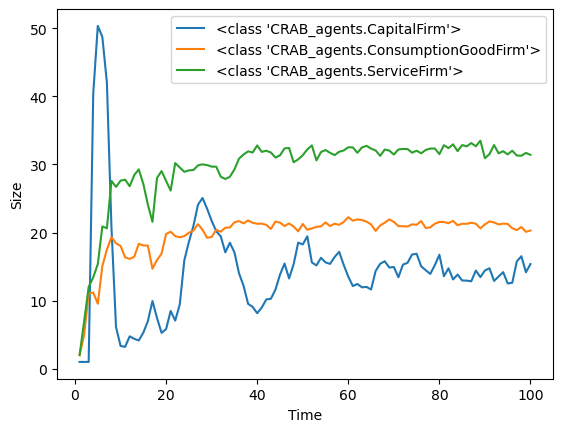

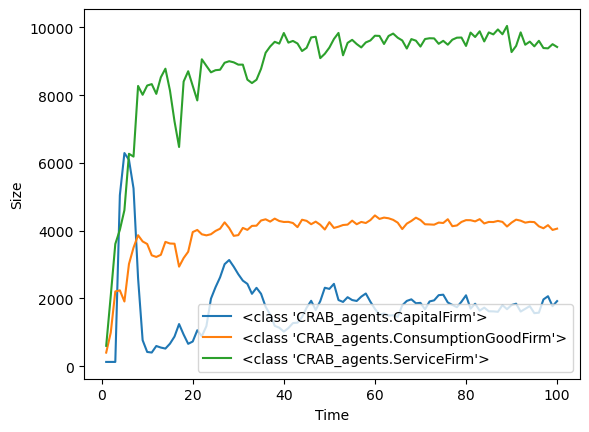

In [19]:
# Plot size (n employers) for all firms (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Size", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Size", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Size", color="tab:green")
plt.show()

# Plot size (n employers) for all firms (total)
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Size", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Size", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Size", color="tab:green")
plt.show()

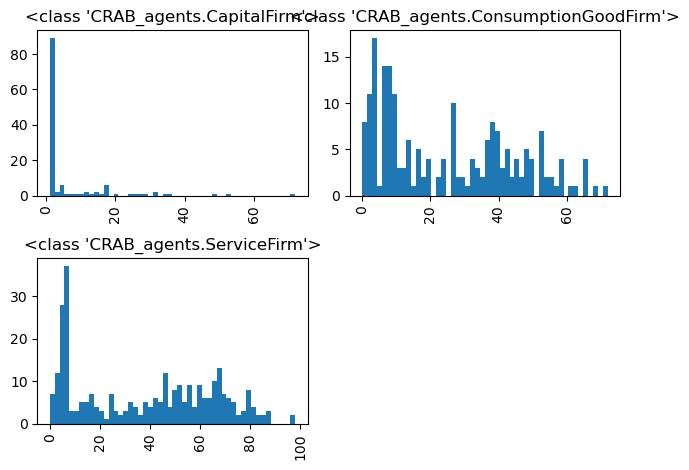

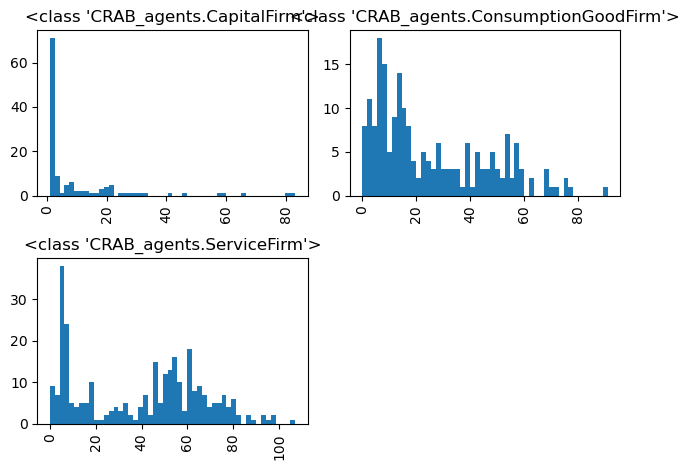

In [12]:
# Plot distribution of firms sizes at end of simulation
for i in range(len(agent_vars_df_list)):
    df = agent_vars_df_list[i]
    df = df[(df["Type"] == "<class 'CRAB_agents.CapitalFirm'>")
            | (df["Type"] == "<class 'CRAB_agents.ConsumptionGoodFirm'>")
            | (df["Type"] == "<class 'CRAB_agents.ServiceFirm'>")
           ]
    df[df["Step"] == max(df["Step"])].hist("Size", by="Type", bins=50)
    plt.tight_layout()
    plt.show()

#### MIN and AVERAGE WAGE

In [ ]:
# Plot average wage
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Wage", color="tab:green")
plt.show()

plot_all_runs(model_vars_df_list, "Avg wage")
plt.show()

model_vars_df_list[0]

In [ ]:
# Plot minimum wage
plot_all_runs(model_vars_df_list, "Min wage", color="tab:blue")
plt.show()

#### PRICES

In [ ]:
# Plot average prices per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Price", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Price", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Price", color="tab:green")
plt.show()

#### MARKET SHARES

In [ ]:
# Plot average market share per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Market share", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Market share", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Market share", color="tab:green")
plt.show()

#### NET WORTH

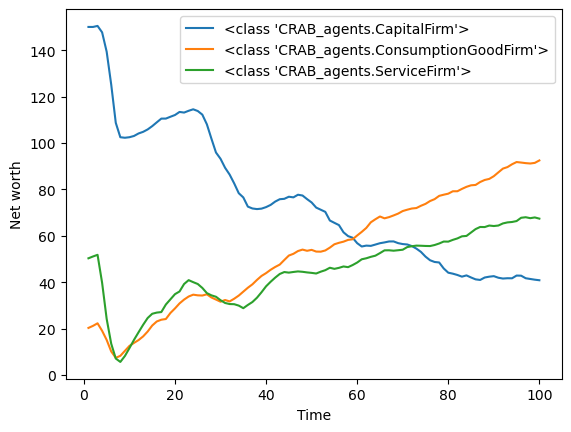

In [24]:
# Plot average net worth per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Net worth", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Net worth", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Net worth", color="tab:green")
plt.show()

#### PRODUCTIVITY and WAGES

In [ ]:
# Plot average ratio productivity : wage per sector
for df in agent_vars_df_list:
    df["Prod/wage"] = df["Prod"]/df["Wage"]
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Prod/wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Prod/wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Prod/wage", color="tab:green")
plt.show()

In [ ]:
# Plot average productivity per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Prod", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Prod", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Prod", color="tab:green")
plt.show()

In [ ]:
# Plot wages
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Wage", color="tab:green")
plt.show()

#### Inventories

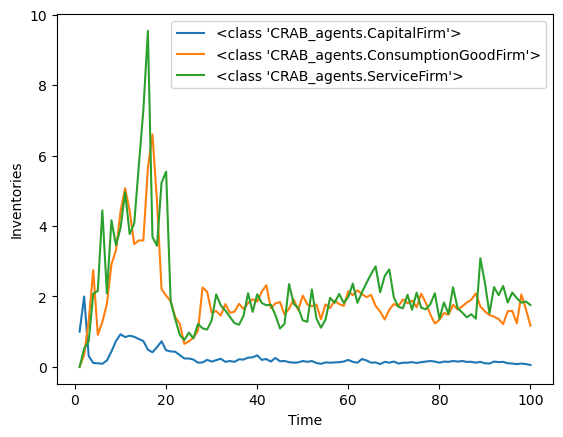

In [21]:
# Plot inventory level
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Inventories", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Inventories", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Inventories", color="tab:green")
plt.show()

# plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Inventories", color="tab:blue")
# plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Inventories", color="tab:orange")
# plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Inventories", color="tab:green")
# plt.show()

##### Production made

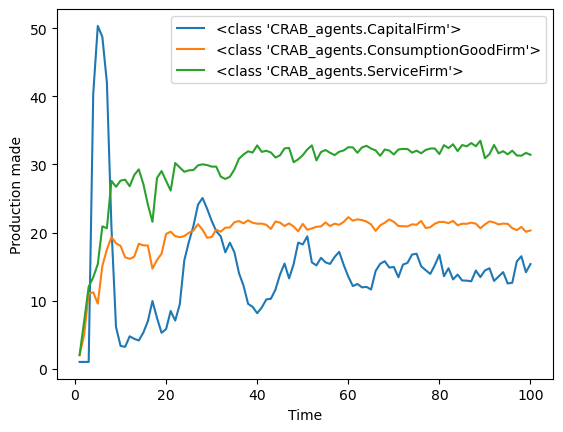

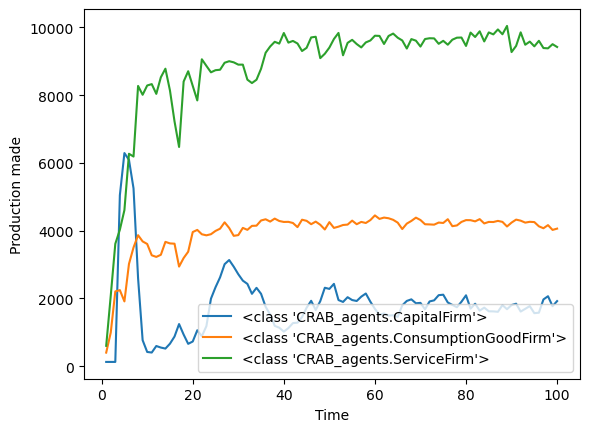

In [23]:
# Plot production made
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Production made", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Production made", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Production made", color="tab:green")
plt.show()

plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Production made", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Production made", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Production made", color="tab:green")
plt.show()

##### Excess production

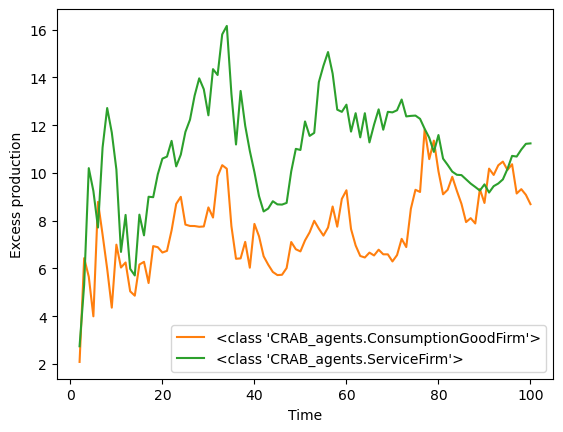

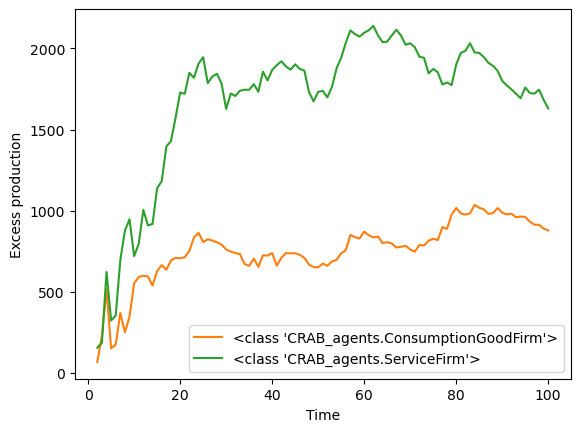

,Step,AgentID,Type,Price,Market share,Prod,Inventories,Desired inv level,Production made,Real demand,Wage,Net worth,Size,Labor demand,Capital desired,Capital amount,Capital ordered,Excess production,Cum excess production
0,1,1,<class 'CRAB_agents.CapitalFirm'>,1.2380,0.008,1.0,1.0,0.1,1.0,0.0,1.031848,150.000000,1.0,1.0,NaN,60.0,NaN,1.0,1.000
1,1,2,<class 'CRAB_agents.CapitalFirm'>,1.2510,0.008,1.0,1.0,0.1,1.0,0.0,1.042870,150.000000,1.0,1.0,NaN,60.0,NaN,1.0,2.000
2,1,3,<class 'CRAB_agents.CapitalFirm'>,1.2370,0.008,1.0,1.0,0.1,1.0,0.0,1.030769,150.000000,1.0,1.0,NaN,60.0,NaN,1.0,3.000
3,1,4,<class 'CRAB_agents.CapitalFirm'>,1.2290,0.008,1.0,1.0,0.1,1.0,0.0,1.024292,150.000000,1.0,1.0,NaN,60.0,NaN,1.0,4.000
4,1,5,<class 'CRAB_agents.CapitalFirm'>,1.2050,0.008,1.0,1.0,0.1,1.0,0.0,1.004201,150.000000,1.0,1.0,NaN,60.0,NaN,1.0,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062595,0,0,0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2062596,0,0,0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2062597,0,0,0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2062598,100,20929,<class 'CRAB_agents.ConsumptionGoodFirm'>,1.2588,0.000,1.0,0.0,NaN,1.0,1.0,1.049000,69.715787,0.0,NaN,NaN,8.0,NaN,0.0,74638.696


In [46]:
# Plot excess production (production made - real demand)
for df in agent_vars_df_list:
    df["Excess production"] = df["Production made"] - df["Real demand"]
# plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Excess production", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Excess production", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Excess production", color="tab:green")
plt.show()

# plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Excess production", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Excess production", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Excess production", color="tab:green")
plt.show()

for df in agent_vars_df_list:
    df[df["Excess production"] < 0] = 0
    df["Cum excess production"] = df.groupby("Type")["Excess production"].cumsum()

df

#### MACHINES

##### Capital (average per sector)

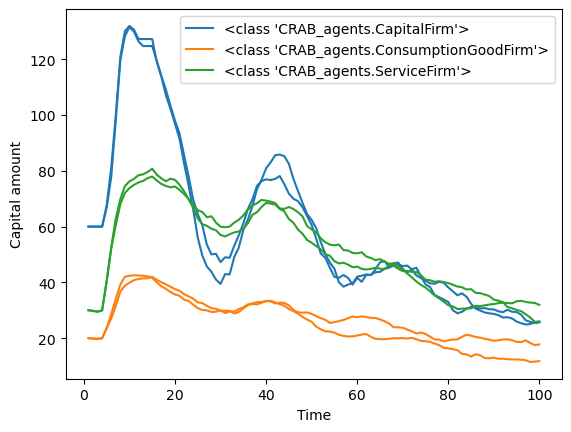

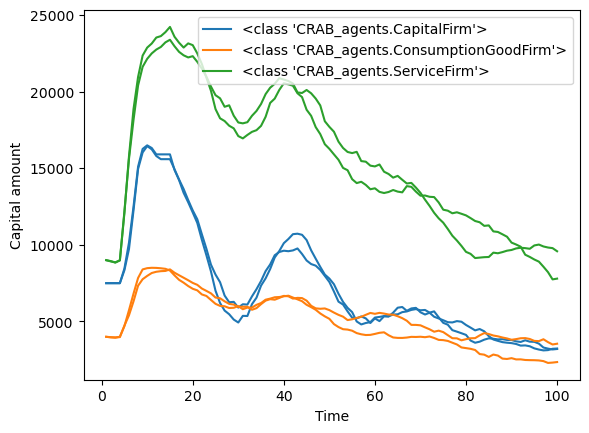

In [18]:
# Plot difference between desired machines and ordered machines (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital amount", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital amount", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital amount", color="tab:green")
plt.show()

# Plot difference between desired machines and ordered machines (sum)
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital amount", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital amount", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital amount", color="tab:green")
plt.show()

##### Capital demand (average per sector)

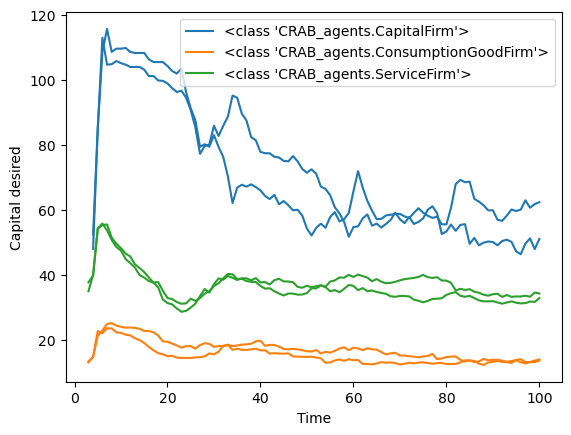

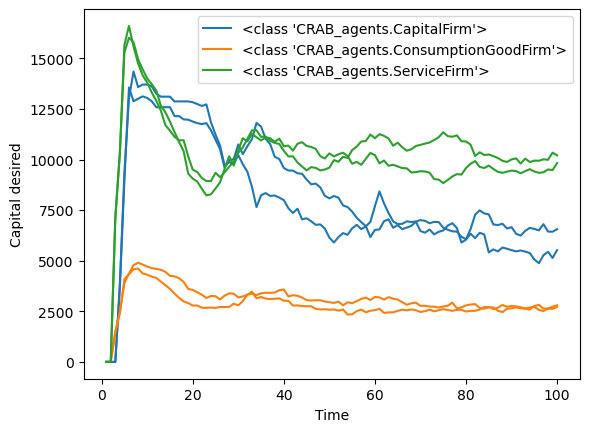

In [19]:
# Plot difference between desired machines and ordered machines (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital desired", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital desired", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital desired", color="tab:green")
plt.show()

# Plot difference between desired machines and ordered machines (sum)
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital desired", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital desired", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital desired", color="tab:green")
plt.show()

##### Orders per sector

In [ ]:
# Plot orders per sector (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital ordered", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital ordered", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital ordered", color="tab:green")
plt.show()

# Plot orders per sector (sum)
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital ordered", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital ordered", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital ordered", color="tab:green")
plt.show()

##### Supplier changes

In [ ]:
# Plot number of firms that changed supplier per timestep
plot_all_runs(model_vars_df_list, "Changed supplier cap", color="tab:blue")
plot_all_runs(model_vars_df_list, "Changed supplier cons", color="tab:orange")
plot_all_runs(model_vars_df_list, "Changed supplier serv", color="tab:green")
plt.show()

##### Machine end of lifetime

In [ ]:
# Plot number of machines died every timestep
plot_all_runs(model_vars_df_list, "Frac machines dead")